In [ ]:
!pip install selenium
import folium
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mejorCamino = ""

In [ ]:
# Crear una matriz de distancias entre cada ciudad
distancias = np.array([[0, 401, 79.2, 438, 194, 165, 241, 1102, 806, 1234, 1031, 1237, 401, 752, 945],
                      [401 , 0, 467, 845, 582, 559, 424, 1493, 1203, 1623, 1434, 1631, 802, 1140, 1329],
                      [79.2 , 467, 0, 361, 118, 88.7, 170, 1031, 726, 1156, 961, 1165, 329, 674, 865],
                      [438 , 845, 361, 0, 318, 282, 302, 867, 832, 995, 1050, 979, 443, 407, 557],
                      [194 , 582, 118, 318, 0, 48, 54, 913, 621, 1042, 849, 1050, 215, 559, 747],
                      [165 , 559, 88.7, 282, 48, 0, 39, 949, 663, 1082, 903, 968, 268, 594, 804],
                      [241 , 424, 170, 302, 54, 39, 0, 860, 600, 993, 831, 894, 194, 508, 694],
                      [1102, 1493, 1031, 867, 913, 949, 860, 0, 433, 296, 365, 295, 745, 449, 525],
                      [806, 1203, 726, 832, 621, 663, 600, 433, 0, 343, 276, 353, 405, 717, 795],
                      [1234, 1623, 1156, 995, 1042, 1082, 993, 296, 343, 0, 129, 16.2, 696, 580, 670],
                      [1031, 1434, 961, 1050, 849, 903, 831, 365, 276, 129, 0, 120, 640, 650, 731],
                      [1237, 1631, 1165, 979, 1050, 968, 894, 295, 353, 16.2, 120, 0, 702, 585, 657],
                      [401 , 802, 329, 443, 215, 268, 194, 745, 405, 696, 640, 702, 0, 404, 598],
                      [752, 1140, 674, 407, 559, 594, 508, 449, 717, 580, 650, 585, 404, 0, 198],
                      [945, 1329, 865, 557, 747,804, 694, 525, 795, 670, 731, 657, 598, 198, 0]])

# Crear una matriz del valor total de peajes entre cada ciudad
peajes = np.array([[0, 46600, 27500, 99600, 49600, 47900, 75700, 160000, 170300, 213900, 203600, 175900, 93000, 122800, 140100],
                  [46600, 0, 55900, 133900, 80300, 78500, 104700, 183400, 199200, 233500, 229500, 222200, 122500, 156000, 171100],
                  [27500, 55900, 0, 144200, 22100, 40800, 57300, 141600, 142800, 186400, 183400, 267800, 74600, 328900, 129500],
                  [99600, 133900, 144200, 0, 70700, 55400, 45400, 103700, 137900, 139000, 130800, 142500, 74800, 55100, 42600],
                  [49600, 80300, 22100, 70700, 0, 15300, 24400, 103100, 118900, 164300, 149200, 141900, 42200, 75700, 90800],
                  [47900, 78500, 40800, 55400, 15300, 0, 39700, 100000, 134200, 138100, 164500, 138800, 57500, 72600, 87700],
                  [75700, 104700, 57300, 45400, 24400, 39700, 0, 78700, 106100, 118100, 136400, 117500, 29400, 51300, 66400],
                  [160000, 183400, 141600, 103700, 103100, 100000, 78700, 0, 47800, 48700, 37600, 49300, 97500, 49300, 29900],
                  [170300, 199200, 142800, 137900, 118900, 134200, 106100, 47800, 0, 40700, 54500, 41000, 76700, 86600, 67200],
                  [213900, 233500, 186400, 139000, 164300, 138100, 118100, 48700, 40700, 0, 24900, 0, 122100, 85300, 66900],
                  [203600, 229500, 183400, 130800, 149200, 164500, 136400, 37600, 54500, 24900, 0, 33500, 107000, 76400, 57000],
                  [175900, 222200, 267800, 142500, 141900, 138800, 117500, 49300, 41000, 0, 33500, 0, 112400, 88100, 68700],
                  [93000, 122500, 74600, 74800, 42200, 57500, 29400, 97500, 76700, 122100, 107000, 112400, 0, 70100, 85200],
                  [122800, 156000, 328900, 55100, 75700, 72600, 51300, 49300, 86600, 85300, 76400, 88100, 70100, 0, 15100],
                  [140100, 171100, 129500, 42600, 90800, 87700, 66400, 29900, 67200, 66900, 57000, 68700, 85200, 15100, 0]])

consumoKwid = 0.0139
galonGasolina = 10766
velPromedio = 75
horaVendedor = 8000

galones = distancias * consumoKwid # Es la cantidad de galones consumidos por cada una de las distancias teniendo en cuenta el consumo del renault Kwid
costoGasolina = galones * galonGasolina # Es el costo en gasolina del trayecto por cada distancia
costoViaje = costoGasolina + peajes # Es el costo de la gasolina por cada trayecto más el valor total de los peajes entre cada ciudad
sueldoVendedor = (distancias/velPromedio) * horaVendedor # Es el tiempo que se tarda en recorrer cada trayecto a una velocidad promedio de 75 km/hora multiplicado por el valor de la hora del vendedor
costoTotal = costoViaje + sueldoVendedor

adjacency_mat = costoTotal

In [ ]:
cities = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
best_solution = []
#https://jaketae.github.io/study/genetic-algorithm/

def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=5,
    n_iter=30,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat

def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )

def fitness(self, chromosome):
  #chromosome = chromosome.append(chromosome[0])
  
  #print(chromosome)
  return sum(
      [
          self.adjacency_mat[chromosome[i], chromosome[i + 1]]
          for i in range(len(chromosome) - 1)
      ]
  ) #+ self.adjacency_mat[chromosome[-1], chromosome[0]]

def evaluate(self):
    distances = np.asarray(
        #a = chromosome[0]
        #np.append(chromosome, a, axis=None)
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    self.score = np.min(distances)
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
def select(self, k=4):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

def mutate(self, p_cross=0.1, p_mut=0.1):
  next_bag = []
  children = self.crossover(p_cross)
  for child in children:
      if np.random.rand() < p_mut:
          next_bag.append(swap(child))
      else:
          next_bag.append(child)
  return next_bag

In [ ]:
pop = init_population(cities, adjacency_mat, 15)

Population.fitness = fitness

Population.evaluate = evaluate

Population.select = select

Population.crossover = crossover

Population.mutate = mutate

In [ ]:
best_solution = genetic_algorithm(cities, adjacency_mat, n_iter=20000, verbose=True)
best_solution

Se han truncado las últimas 5000 líneas del flujo de salida.
Generation 15000: 1289566.4790066665
Generation 15001: 1289566.4790066665
Generation 15002: 1289566.4790066665
Generation 15003: 1289566.4790066665
Generation 15004: 1289566.4790066665
Generation 15005: 1289566.4790066665
Generation 15006: 1289566.4790066665
Generation 15007: 1289566.4790066665
Generation 15008: 1289566.4790066665
Generation 15009: 1289566.4790066665
Generation 15010: 1289566.4790066665
Generation 15011: 1289566.4790066665
Generation 15012: 1289566.4790066665
Generation 15013: 1289566.4790066665
Generation 15014: 1289566.4790066665
Generation 15015: 1289566.4790066665
Generation 15016: 1289566.4790066665
Generation 15017: 1289566.4790066665
Generation 15018: 1289566.4790066665
Generation 15019: 1289566.4790066665
Generation 15020: 1289566.4790066665
Generation 15021: 1289566.4790066665
Generation 15022: 1289566.4790066665
Generation 15023: 1289566.4790066665
Generation 15024: 1289566.4790066665
Generation 150

[1, 0, 2, 5, 4, 12, 6, 3, 13, 14, 7, 11, 9, 10, 8]

Generation 0: 3081161.0482800007
Generation 100: 2291019.2139400006
Generation 200: 2101738.9219266665
Generation 300: 2040777.8098599997
Generation 400: 1819196.1223799998
Generation 500: 1771625.8803266666
Generation 600: 1678879.721313333
Generation 700: 1678879.721313333
Generation 800: 1610986.3734799998
Generation 900: 1610986.3734799998
Generation 1000: 1607556.3407466665
Generation 1100: 1607556.3407466665
Generation 1200: 1607556.3407466665
Generation 1300: 1607556.3407466665
Generation 1400: 1595078.1729466664
Generation 1500: 1595078.1729466664
Generation 1600: 1595078.1729466664
Generation 1700: 1595078.1729466664
Generation 1800: 1595078.1729466664
Generation 1900: 1595078.1729466664


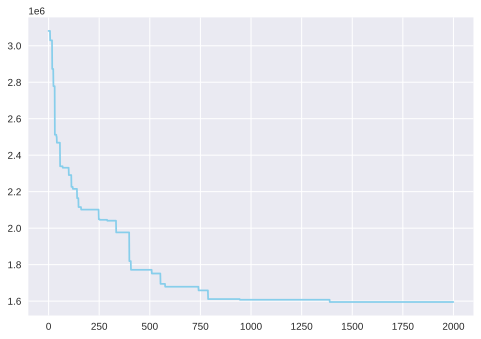

[4, 6, 12, 8, 10, 9, 11, 7, 14, 13, 3, 5, 0, 1, 2]


In [ ]:
best, history = genetic_algorithm(
    cities,
    adjacency_mat,
    n_iter=2000,
    verbose=False,
    print_interval=100,
    return_history=True,
)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)

In [ ]:
ciudades = best_solution
#ciudades = [5, 4, 14, 10, 2, 1, 6, 12, 11, 9, 0, 3, 8, 7, 13]
# Coordenadas de las ciudades
# Enlace de coordenadas: https://www.geodatos.net/coordenadas/colombia/

coordenadas = {
    0: [3.53944, -76.30361], # Palmira
    1: [1.21361, -77.28111], # Pasto
    2: [4.08466, -76.19536], # Tulúa
    3: [4.60971, -74.08175], # Bogotá
    4: [4.81333, -75.69611], # Pereira
    5: [4.53389, -75.68111], # Armenia
    6: [5.06889, -75.51738], # Manizales
    7: [10.46314, -73.25322], # Valledupar
    8: [8.74798, -75.88143], # Monteria
    9: [10.91843, -74.76459], # Soledad
    10: [10.39972, -75.51444], # Cartagena
    11: [10.96854, -74.78132], # Barranquilla
    12: [6.25184, -75.56359], # Medellin
    13: [7.12539, -73.1198], # Bucaramanga
    14: [7.89391, -72.50782] # Cucuta
  }

nombres = {
    0: 'Palmira',
    1: 'Pasto',
    2: 'Tulúa',
    3: 'Bogotá',
    4: 'Pereira',
    5: 'Armenia',
    6: 'Manizales',
    7: 'Valledupar',
    8: 'Monteria',
    9: 'Soledad',
    10: 'Cartagena',
    11: 'Barranquilla',
    12: 'Medellin',
    13:'Bucaramanga',
    14: 'Cucuta'
  }

# Creamos el mapa y lo ubicamos en la ciudad inicial
mapa = folium.Map(location=coordenadas[ciudades[0]], zoom_start=6)

# Agregar un marcador para cada ciudad
for ciudad in ciudades:
  folium.Marker(
      location=coordenadas[ciudad],
      #popup=ciudad,
      tooltip=nombres[ciudad] # Muestra el nombre de cada ciudad al pasar el mouse
  ).add_to(mapa)

# Dibujar la ruta entre las ciudades
ruta = []
for ciudad in ciudades:
    ruta.append(coordenadas[ciudad])
folium.PolyLine(
    locations=ruta,
    color='red'
).add_to(mapa)

# Mostrar el mapa
mapa